In [1]:
import sys
sys.path.append('../') 

import numpy as np
from Test.Sin_Cos.comparesignals import SignalSamplesAreEqual
from Utils.read_signal_file import seperate_file_date
from Utils.plot_graph import plot_data
from Utils.generate_signals import generate_sin_signal, generate_cos_signal


In [2]:
import tkinter as tk

root = tk.Tk()

root.title("DSP Package")
root.geometry("900x700")
# root.resizable(False, False)

root.geometry("900x700+100+100")

label = tk.Label(root, text="Signals Representation", font=("Times New Roman", 20))
label.pack(padx=15, pady=15)


# label = tk.Label(root, text="Signals Generation", font=("Times New Roman", 20))
# label.pack(padx=15, pady=15)

# amplitude_label = tk.Label(root, text="Amplitude", font=("Times New Roman", 18))
# amplitude_label.pack()
# amplitude_textbox = tk.Entry(root, font=("Times New Roman", 15), width=20)
# amplitude_textbox.pack(padx=5, pady=5)

# phase_shift_label = tk.Label(root, text="Phase Shift", font=("Times New Roman", 18))
# phase_shift_label.pack()
# phase_shift_textbox = tk.Entry(root, font=("Times New Roman", 15), width=20)
# phase_shift_textbox.pack(padx=5, pady=5)

# analog_frequency_label = tk.Label(root, text="Analog Frequency", font=("Times New Roman", 18))
# analog_frequency_label.pack()
# analog_frequency_textbox = tk.Entry(root, font=("Times New Roman", 15), width=20)
# analog_frequency_textbox.pack(padx=5, pady=5)

# sampling_frequency_label = tk.Label(root, text="Sampling Frequency", font=("Times New Roman", 18))
# sampling_frequency_label.pack()
# sampling_frequency_textbox = tk.Entry(root, font=("Times New Roman", 15), width=20)
# sampling_frequency_textbox.pack(padx=5, pady=5)


# # how to read the values from the textboxes
# def get_values():
#     amplitude = amplitude_textbox.get()
#     phase_shift = phase_shift_textbox.get()
#     analog_frequency = analog_frequency_textbox.get()
#     sampling_frequency = sampling_frequency_textbox.get()
#     print(amplitude, phase_shift, analog_frequency, sampling_frequency)

# # How to rectrict the values of the textboxes to be only numbers and decimal point
# def validate_float(action, index, value_if_allowed, prior_value, text, validation_type, trigger_type, widget_name):
#     if value_if_allowed:
#         try:
#             float(value_if_allowed)
#             return True
#         except ValueError:
#             return False
#     else:
#         return False
 
# write the import statements here



# How to add a plot to the GUI
# def plot():
#     fig = Figure(figsize=(1, 2))
#     t = np.arange(0, 3, .01)
#     fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))
#     canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
#     canvas.draw()
#     canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# plot()

#     amplitude = amplitude_textbox.get()
#     phase_shift = phase_shift_textbox.get()
#     analog_frequency = analog_frequency_textbox.get()
#     sampling_frequency = sampling_frequency_textbox.get()
#     print(amplitude, phase_shift, analog_frequency, sampling_frequency)







In [3]:
data, signal_type, is_periodic, n_samples = seperate_file_date("Signals\signal1.txt")

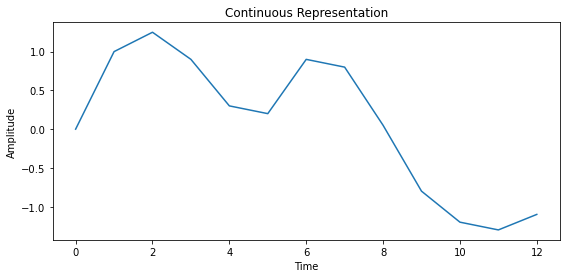

In [4]:
# Extract x and y values from data
x = [point[0] for point in data]
y = [point[1] for point in data]

plot_data(x=x, y=y, plot_type="continuous", title="Continuous Representation", x_label="Time", y_label="Amplitude")

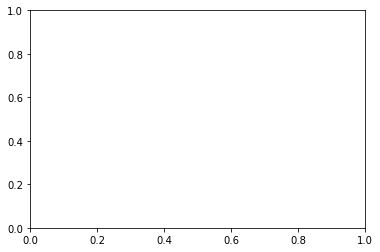

In [5]:
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

canvas.draw()

In [6]:

button = tk.Button(root, text="Generate", font=("Times New Roman", 20), bg="white", fg="black", width=15, height=1)
button.pack(padx=5, pady=5)

root.mainloop()
